In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### 1. Least squares for classification

The simplest linear regression model looks like this: $$ y(\textbf{x}) = \textbf{w}^T\textbf{x} + w_o $$

For a two-class classification problem, $\textbf{x}$ belongs to class C1 if $ y(\textbf{x}) \ge 0 $ and to class C2 if $ y(\textbf{x}) < 0 $. By minimizing the sum of squared errors, we get the analytical solution of the weights: $ \textbf{w} = (X^TX)^{-1}X^TT $

#### 1.1 Balanced dataset
We create a 2 class dataset by sampling points from two Gaussian distributions.

<b>TODO</b>: Plot X1 and X2 and the decision boundary that results from the least squares solution of the weights.

In [3]:
mean1 = [1, 1]
mean2 = [2, 0]
rotation = np.matrix([[1, -1], [1, 1]])
cov1 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)
cov2 = rotation * [[0.04, 0], [0, 0.01]] * np.transpose(rotation)

x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
X1 = np.transpose(np.vstack((x1, y1)))
X2 = np.transpose(np.vstack((x2, y2)))

In [4]:
#TODO: find weights using least squares solution
#X: 200 X 3
#W: 3 X 1
#T: 200 X 1

def get_ls_weights(X1, X2):
    cols = len(X1[0])
    rows1 = len(X1)
    rows2 = len(X2)
    X1_tmp = np.concatenate((np.ones((rows1,1)), X1), axis=1)
    X2_tmp = np.concatenate((np.ones((rows2,1)), X2), axis=1)
    X = np.concatenate((X1_tmp, X2_tmp), axis=0)

    T = np.concatenate((np.ones((rows1, 1)), -np.ones((rows2, 1))), axis=0)
    W = np.dot(np.linalg.pinv(X), T)
    return (X, W)

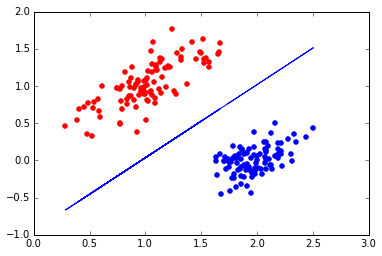

In [5]:
#TODO: plot dataset and decision boundary
plt.scatter(X1[:,0], X1[:,1], color='red')
plt.scatter(X2[:,0], X2[:,1], color='blue')

X, W = get_ls_weights(X1, X2)
decision_boundary = [(-W[0] - W[1] * x) / W[2] for x in X[:,1]]
plt.plot(X[:,1], decision_boundary, "-")

#### 1.2 Outlier dataset
We extend our initial dataset by adding examples from the second class, sampled from another Gaussian.

<b>TODO</b>: Plot X1 and X2_ext and the decision boundary that results from the least squares solution of the weights.

In [6]:
#add outliers
mean_out = [4, -1]
cov_out = [[0.1, 0], [0, 0.1]]
num_outliers = 50
x2_out, y2_out = np.random.multivariate_normal(mean_out, cov_out, num_outliers).T

x2_ext = np.hstack((x2, x2_out))
y2_ext = np.hstack((y2, y2_out))
X2_ext = np.transpose((x2_ext, y2_ext))

In [7]:
#TODO: compute least squares weights for extended dataset
X_ext, W_ext = get_ls_weights(X1, X2_ext)
print W_ext

[[-0.38650833]
 [-0.02199389]
 [ 1.01365415]]


In [8]:
#TODO: plot extended dataset and decision boundary
plt.scatter(X1[:,0], X1[:,1], color='red')
plt.scatter(X2_ext[:,0], X2_ext[:,1], color='blue')

decision_boundary = [(-W_ext[0] - W_ext[1] * x) / W_ext[2] for x in X_ext[:,1]]
plt.plot(X_ext[:,1], decision_boundary, "-")

### 2. Fisher's LDA
Fisher's linear discriminant analysis is a method for dimensionality reduction that aims to find a subspace where the classes are well separated.

<b>TODO</b>: Plot X1, X2 and the line on which the projected data is best separated.

In [9]:
mean1 = [1, 1]
mean2 = [2, 0]
rotation = np.matrix([[1, -1], [1, 1]])
cov1 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)
cov2 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)

x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T

X1 = np.transpose(np.vstack((x1, y1)))
X2 = np.transpose(np.vstack((x2, y2)))

In [10]:
#TODO
plt.scatter(X1[:,0], X1[:,1], color='red')
plt.scatter(X2[:,0], X2[:,1], color='blue')

sample_mean1 = X1.mean(axis=0)
sample_mean2 = X2.mean(axis=0)
Sw = np.concatenate(([np.outer((x-sample_mean1), (x-sample_mean1)) for x in X1], 
                     [np.outer((x-sample_mean2), (x-sample_mean2)) for x in X2]), axis=0)

Sw = reduce(np.add, Sw, [[0,0],[0,0]])
W = np.dot(np.linalg.inv(Sw), (np.subtract(sample_mean2, sample_mean1)))

xs = np.arange(0,2,0.1)
plt.plot(xs, [W[1]/W[0] * x for x in xs], "-")

### 3. Perceptron
The perceptron is another example of linear discriminant model (and the simplest type of neural network) that tries to find a set of weights $ w \in \mathbb{R}^{n+1} $ such that
$ w^T \phi{(x)} \geq{0} $ for examples in class $ C1 $ and $ w^T \phi{(x)} <0 $ for examples in class $C2$, where $\phi{(x)} = [\phi{(x_0 = 1)}\ \phi{(x_1)}\ ...\ \phi{(x_n)}],\ x \in \mathbb{R}^{n} $

<b>TODO:</b> Implement the perceptron algorithm and find the sets of weights $w$ that separate the 2 datasets from section 1. Plot the datasets and the decision boundaries.

[ 1.         -1.29400719  2.00365402]


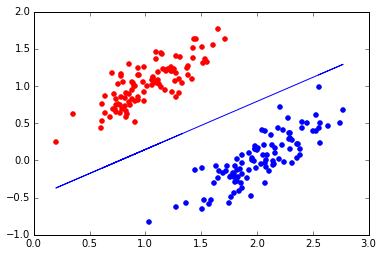

In [40]:
plt.scatter(X1[:,0], X1[:,1], color='red')
plt.scatter(X2[:,0], X2[:,1], color='blue')

cols = len(X1[0])
rows1 = len(X1)
rows2 = len(X2)
X1_tmp = np.concatenate((np.ones((rows1,1)), X1), axis=1)
X2_tmp = np.concatenate((np.ones((rows2,1)), X2), axis=1)
X = np.concatenate((X1_tmp, X2_tmp), axis=0)

T = np.concatenate((np.ones((len(X1), 1)), -np.ones((len(X2), 1))), axis=0)
W = np.zeros(len(X[0]))

MAX_STEP = 1000
step = 0
while True:
    step += 1
    for i in range(len(X)):
        x = X[i]
        if np.sign(np.dot(W, x)) * T[i] <= 0:
            W = W + T[i] * x
        if len(filter(lambda i: np.sign(np.dot(W, X[i])) * T[i] <= 0, range(len(X)))) == 0:
            break

    if (len(filter(lambda i: np.sign(np.dot(W, X[i])) * T[i] <= 0, range(len(X)))) == 0 
        or step > MAX_STEP):
        break
print W

plt.plot(X[:,1], -W[1]/W[2] * X[:,1] - W[0]/W[2], "-")